In [9]:
from skimage import io
from skimage.transform import resize
from skimage.feature import hog
import numpy as np

# Función para procesar la imagen nueva y obtener características HOG
def process_new_image(image_path):
    # Leer la imagen y convertir a escala de grises
    image = io.imread(image_path, as_gray=True)
    
    # Redimensionar la imagen a 28x28 píxeles
    image = resize(image, (28, 28), anti_aliasing=True)
    
    # Extraer características HOG
    features = hog(image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
    
    return features

# Ruta a la nueva imagen
image_path = 'samples/002.png'  # Cambia esto a la ruta de tu imagen

# Obtener características HOG
features = process_new_image(image_path)

# Imprimir el tamaño del vector de características HOG
print("Number of HOG features:", features.shape[0])


Number of HOG features: 2025


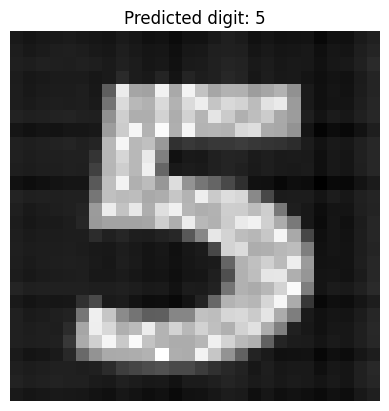

In [17]:
from skimage import io
from skimage.transform import resize
from skimage.feature import hog
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Función para procesar la imagen nueva y obtener características HOG
def process_new_image(image_path):
    # Leer la imagen y convertir a escala de grises
    image = io.imread(image_path, as_gray=True)
    
    # Redimensionar la imagen a 28x28 píxeles
    image = resize(image, (28, 28), anti_aliasing=True)
    
    # Extraer características HOG
    features = hog(image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
    
    return image, features

# Función para hacer predicciones con el modelo cargado
def predict_digit(image_path, model_path):
    # Procesar la imagen para extraer características HOG
    image, features = process_new_image(image_path)
    features = features.reshape(1, -1)  # Redimensionar el vector a (1, -1)
    
    # Cargar el modelo entrenado
    model = pickle.load(open(model_path, 'rb'))
    
    # Realizar la predicción
    prediction = model.predict(features)
    
    return image, prediction[0]

# Ejemplo de uso
image_path = 'samples/004.png'  # Ruta a la nueva imagen
model_path = 'modelo_hog_proyectoFinal.sav'  # Ruta al modelo entrenado

# Obtener la imagen y la predicción
image, digit = predict_digit(image_path, model_path)

# Mostrar la imagen y la predicción
plt.imshow(image, cmap='gray')
plt.title(f'Predicted digit: {digit}')
plt.axis('off')  # Ocultar los ejes
plt.show()
